In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
xs = np.linspace(-6,6,1000)

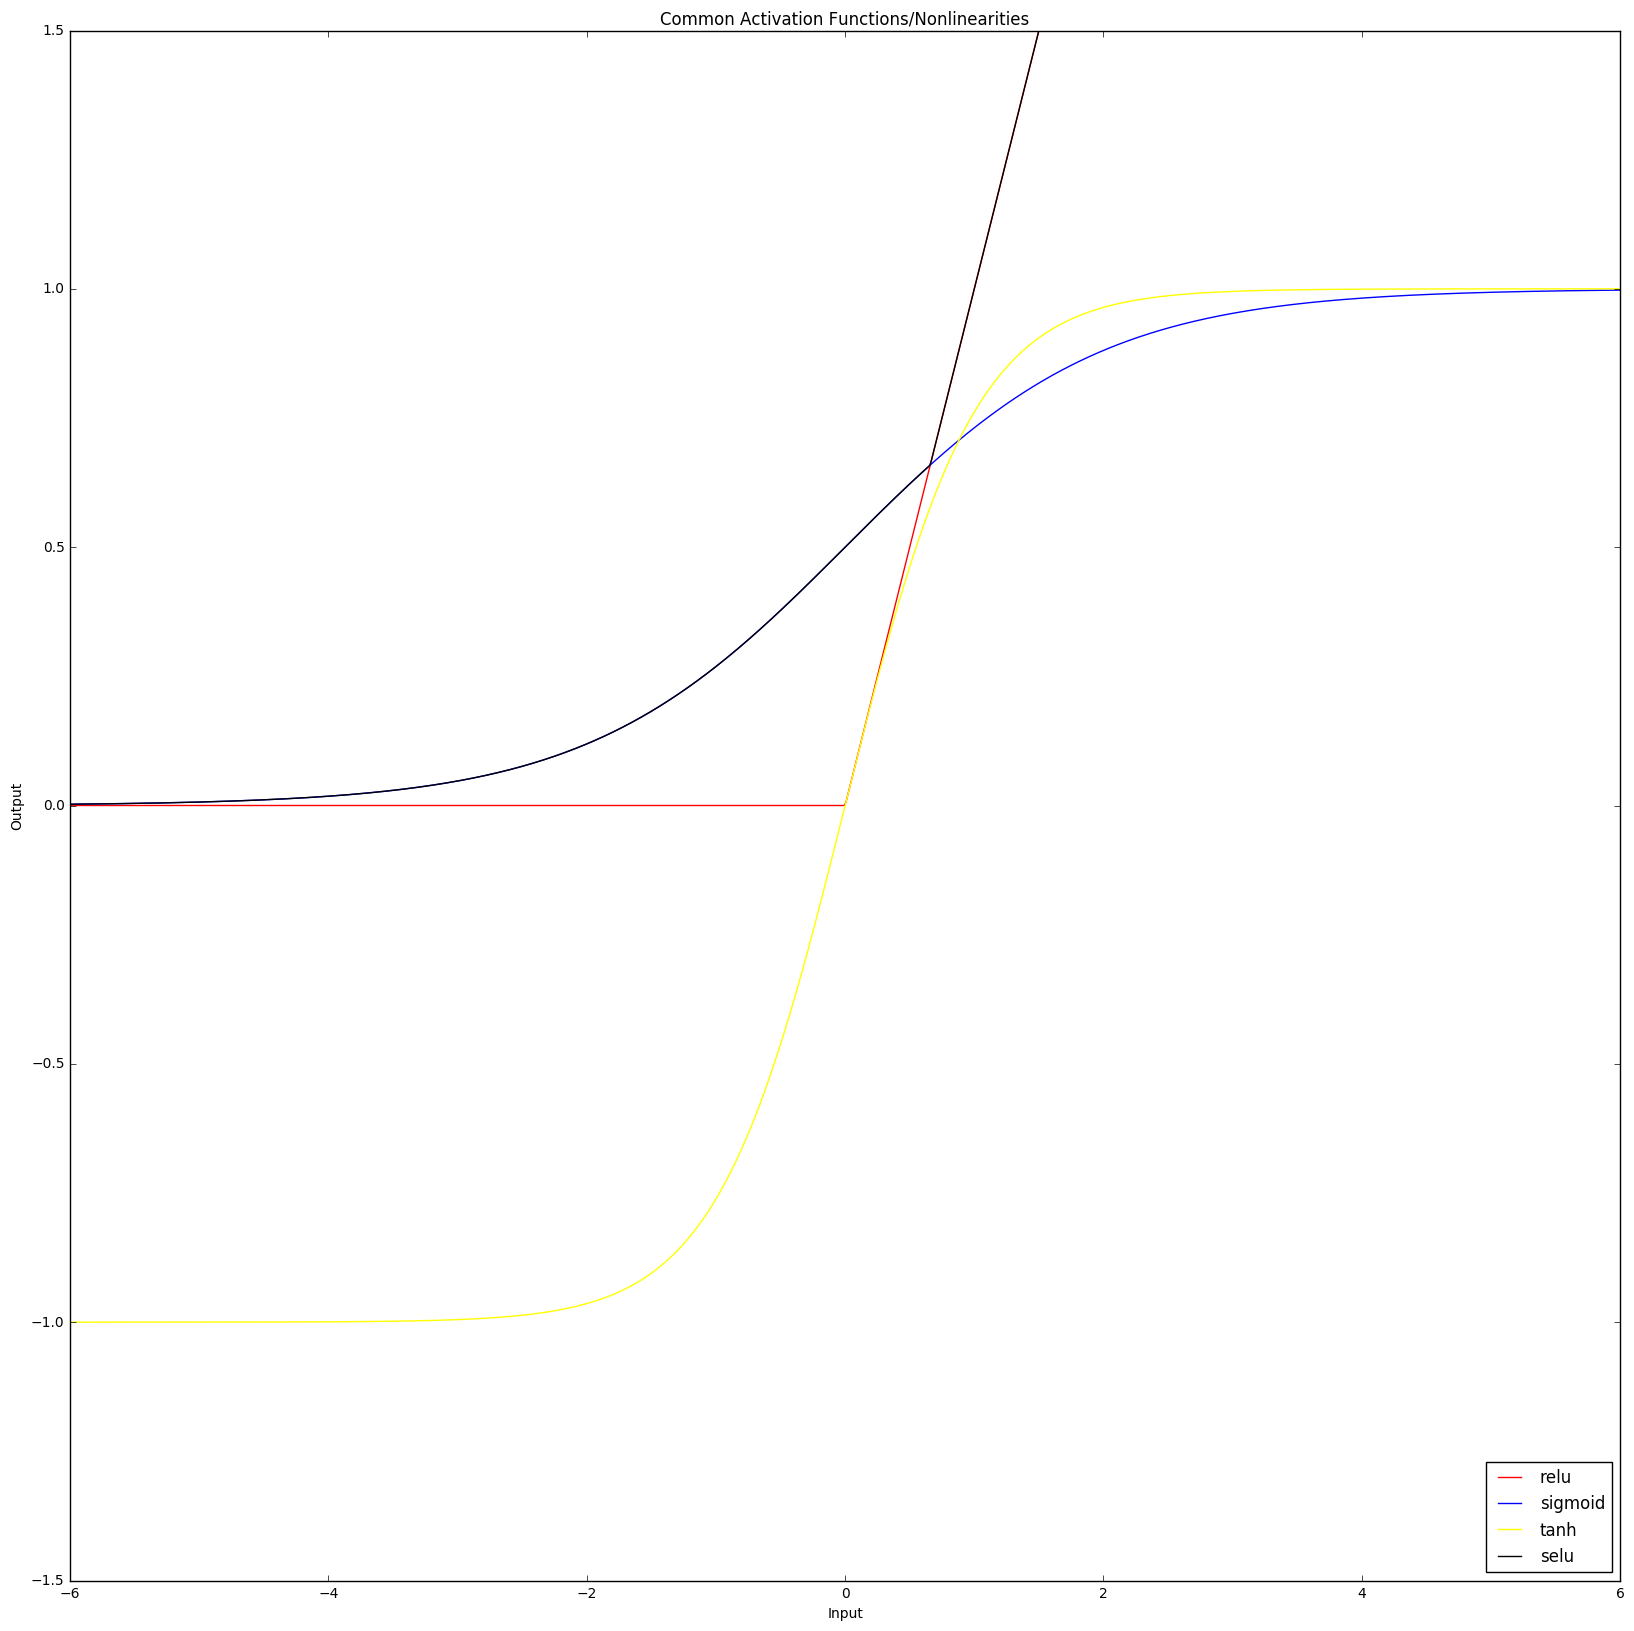

In [15]:
plt.figure(figsize=(20,20))
plt.plot(xs, np.maximum(xs, 0), label='relu', color ='red')
plt.plot(xs, 1 / (1 + np.exp(-xs)), label='sigmoid',color ='blue')
plt.plot(xs, np.tanh(xs), label='tanh' ,color ='yellow')

# plt.plot(xs,  np.maximum(1 / (1 + np.exp(-xs)),0), label='selu' ,color ='black')

plt.xlabel('Input')
plt.xlim([-6, 6])
plt.ylabel('Output')
plt.ylim([-1.5, 1.5])
plt.title('Common Activation Functions/Nonlinearities')
plt.legend(loc='lower right')

In [25]:
# %% First a tf.Tensor
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)
x_np = np.linspace(-3.0,3.0,n_values) 


In [27]:
print(x_np)

[-3.         -2.80645161 -2.61290323 -2.41935484 -2.22580645 -2.03225806
 -1.83870968 -1.64516129 -1.4516129  -1.25806452 -1.06451613 -0.87096774
 -0.67741935 -0.48387097 -0.29032258 -0.09677419  0.09677419  0.29032258
  0.48387097  0.67741935  0.87096774  1.06451613  1.25806452  1.4516129
  1.64516129  1.83870968  2.03225806  2.22580645  2.41935484  2.61290323
  2.80645161  3.        ]


In [3]:
# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)
result

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [4]:
# %% Alternatively pass a session to the eval fn:
x.eval(session=sess)


array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [5]:
sess = tf.InteractiveSession()

# %% Now this will work!
x.eval()


array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [6]:
# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [7]:
# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

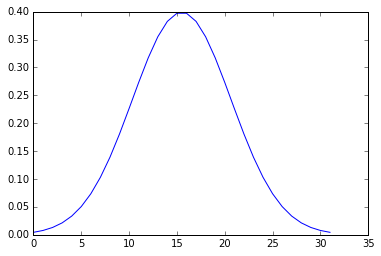

In [8]:
# %% Execute the graph and plot the result
plt.plot(z.eval())

In [9]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [10]:
# %% Or in a more friendly format
print(z.get_shape().as_list())
print(tf.shape(z).eval())
print(tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

[32]
[32]
[[32]
 [32]
 [ 3]
 [ 4]]


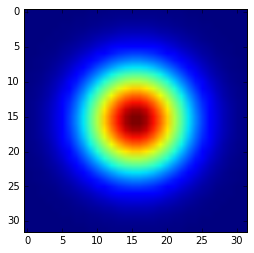

In [11]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())

In [12]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
a=tf.matmul(x, y)


z = tf.mul(a, z_2d)

In [13]:
print(a.eval()[0,0], z_2d.eval()[0,0])

-0.14112 1.96419e-05


In [14]:
print(tf.shape(y).eval())

[ 1 32]


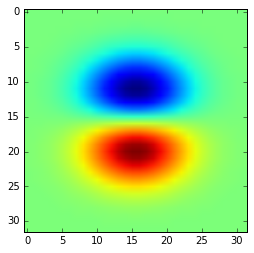

In [15]:
plt.imshow(z.eval())

In [16]:
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Shape', 'Shape_1', 'Shape_2', 'pack/2_1', 'pack/3_1', 'pack', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'Mul', 'Shape_3']


In [17]:
# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.mul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel


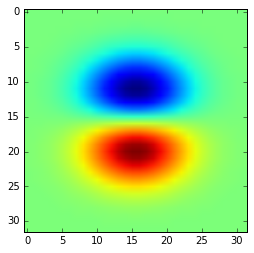

In [18]:
# %% Confirm this does something:
gabor1 = gabor().eval()
plt.imshow(gabor1)


(3, 3)


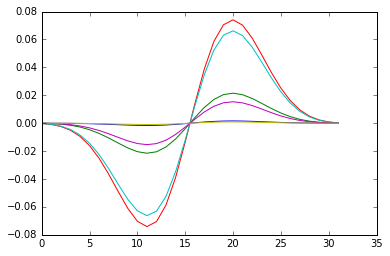

In [19]:
print(gabor1[15:18,15:18].shape)
plt.plot(gabor1[:,1:40:6])

In [20]:
# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(2, [W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

(512, 512, 3)


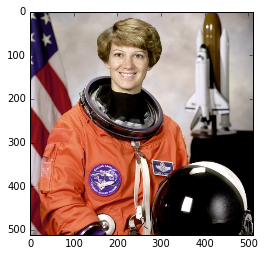

In [21]:
# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
print(img.shape)

In [22]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

In [23]:
# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor())

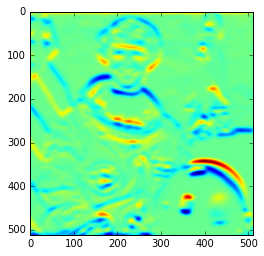

In [24]:
# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)